## 1. Reading and Exploring Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
nulls = sum(df.isnull().sum())
duplicated = sum(df.duplicated())

print(f"Number of Null Values = {nulls}")
print(f"Number of Duplicated Rows = {duplicated}")

Number of Null Values = 0
Number of Duplicated Rows = 0


In [5]:
# Checking Dataset Balance
value_counts = df['label'].value_counts().sort_index()
value_counts.index = ['Not Spam', 'Spam']

value_counts

Not Spam    39538
Spam        43910
Name: count, dtype: int64

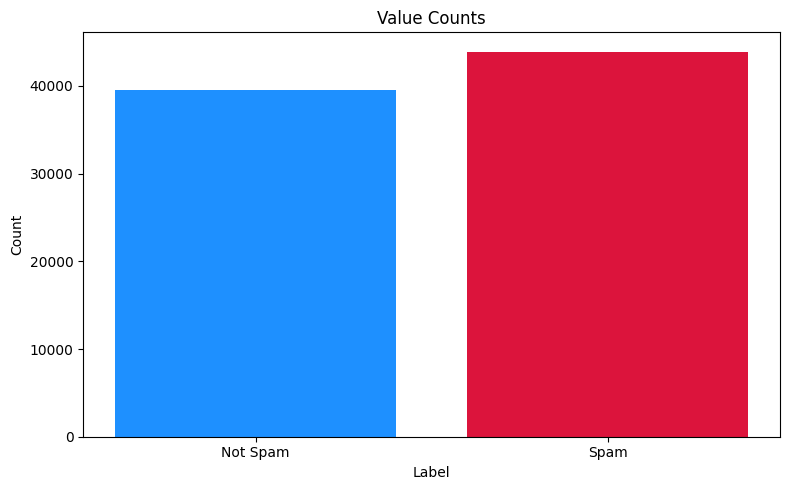

In [6]:
plt.figure(figsize = (8, 5), tight_layout = True)
plt.bar(value_counts.index, value_counts.values, color=['DodgerBlue', 'Crimson'])

plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Value Counts")

plt.tight_layout()
plt.show()

## 2. Preprocessing

## 2.1. Dropping Non-English Rows

In [7]:
from langdetect import detect

def is_english(tweet):

    try:
        return detect(tweet) == 'en'

    except:
        return False

In [8]:
df = df[df['text'].apply(is_english)]

print("Shape of DataFrame after dropping non-English Emails:", df.shape)
df.head()

Shape of DataFrame after dropping non-English Emails: (78940, 2)


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [9]:
all_text = ''.join(df['text'].tolist())
unique_letters = sorted(list(set(all_text)))

print(unique_letters)

['\x01', '\x02', '\x03', '\x05', '\x07', '\x08', '\n', '\x0e', '\x0f', '\x10', '\x11', '\x12', '\x13', '\x14', '\x15', '\x16', '\x17', '\x19', '\x1b', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x80', '\x81', '\x82', '\x83', '\x84', '\x85', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8d', '\x8e', '\x8f', '\x90', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9d', '\x9e', '\x9f', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', '×', 'Ü', 'Ý', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', '

# 2.2. Text Cleaning

In [10]:
import re
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/mohamed-
[nltk_data]     hamdy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mohamed-
[nltk_data]     hamdy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def text_cleaning(text):

    # Converting text to lowercase
    text = text.lower()

    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Replacing Numbers with a Token
    text = re.sub(r'\d+', '<NUM>', text)

    # Normalize Elongated Words
    text = re.sub(r'(.)\1+', r'\1\1', text) 

    # Expand Contractions (e.g.: weren't => were not)
    text = contractions.fix(text)
    
    # Removing Punctuations and Non-English Charachters
    text = re.sub(r'[^a-z0-9\s]', '', text) 

    # Lemmatization  
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Returning the Cleaned Text 
    cleaned_text = ' '.join(words)
    return cleaned_text

In [12]:
df['text'] = df['text'].apply(text_cleaning)
df['text'].head()

0    ounce feather bowl hummingbird opec moment ala...
1    wulvob get your medircations online qnb ikud v...
2    computer connection from cnn com wednesday esc...
3    university degree obtain a prosperous future m...
4    thanks for all your answer guy i know i should...
Name: text, dtype: object

In [13]:
all_text = ''.join(df['text'].tolist())
unique_letters = sorted(list(set(all_text)))

print(unique_letters)

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


## 2.3. Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, 
    test_size = 0.2, 
    random_state = 42, 
    stratify = df['label'],
    shuffle = True
)

pd.DataFrame(train_df).to_csv('../data/processed/train.csv', index = False)
pd.DataFrame(test_df).to_csv('../data/processed/test.csv', index = False)
test_df.head()

,label,text
51626,0,below is a list of the major item that are sti...
76658,0,escapenumberfxml version escapenumberd escapen...
5491,1,our offer are unbeatable and we always update ...
6697,1,chms pioneering explosive wireless niche in ch...
66300,1,hi there try our market leading product c i a ...


In [15]:
X_train = train_df['text']
X_test = test_df['text']
y_train = train_df['label']
y_test = test_df['label']

In [16]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (63152,)
Shape of X_test: (15788,)
Shape of y_train: (63152,)
Shape of y_test: (15788,)


# 2.4. Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')
X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test)

X_train 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5462956 stored elements and shape (63152, 212929)>

# 3. Model

# 3.1. Training

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)  

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# 3.2. Evaluation

In [48]:
y_pred = model.predict(X_test)
y_pred[:5] 

array([0, 0, 1, 1, 1])

In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7548
           1       0.99      0.98      0.98      8240

    accuracy                           0.98     15788
   macro avg       0.98      0.98      0.98     15788
weighted avg       0.98      0.98      0.98     15788



In [21]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate 

metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
k_fold_cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
scoring = cross_validate(model, X_test, y_test, scoring = metrics, cv = k_fold_cv)

for metric in metrics:
    score = np.mean(scoring[f'test_{metric}'])
    score = round(score, 3) * 100
    print(f"{metric} = {score}%")

accuracy = 97.5%
precision_macro = 97.5%
recall_macro = 97.5%
f1_macro = 97.5%


# 3.3. Saving Model and Vectorizer

In [ ]:
import pickle 

with open('../models/logistic_regression.pkl', 'wb') as file:
    pickle.dump(model, file)

In [53]:
with open('../models/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)